### Import required libraries



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the CSV file (i.e renttherunway.csv) and display the first 5 rows of the dataframe. Check the shape and info of the data

In [2]:
df = pd.read_csv('renttherunway.csv')
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


###  2. Check the first few samples, shape, info of the data

In [3]:
df.shape

(192544, 16)

In [4]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [6]:
df.size

3080704

### Data cleansing and Exploratory Data Analysis
#### Checking for Duplicate records

In [8]:
df[df.duplicated()]

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date


#### 4. Drop the columns which you think redundant for the analysis

In [10]:
df=df.drop(columns=['Unnamed: 0','user_id','item_id','review_text','review_summary','review_date'])

In [11]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [12]:
df.shape

(192544, 10)

#### 5.Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. 

In [14]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  object 
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 14.7+ MB


#### Removing the pound 

In [16]:
df['weight'] = df['weight'].str.rstrip('lbs')

In [17]:
df.head(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145,10.0,wedding,athletic,gown,"5' 9""",12,27.0


#### Converting weight column

In [18]:
df['weight'] = df['weight'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   174133 non-null  object 
 2   weight      162562 non-null  float64
 3   rating      192462 non-null  float64
 4   rented for  192534 non-null  object 
 5   body type   177907 non-null  object 
 6   category    192544 non-null  object 
 7   height      191867 non-null  object 
 8   size        192544 non-null  int64  
 9   age         191584 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 14.7+ MB


#### 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. 

In [20]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [21]:
df['rented for'] = df['rented for'].replace({'party: cocktail':'party'})

In [22]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

In [23]:
mode = df['rented for'].mode()[0]

df['rented for'].fillna(mode,inplace=True)

In [24]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

##### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [25]:
df.height

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [26]:
df.height = ['0' if 'nan' in x else ((float(str(x).split("'")[0]) * 12) + (float(str(x).split("'")[1].strip('"'))) )
                                          for x in df.height.astype(str)]
df.height = df.height.astype(float)

df.height

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

#### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.


In [27]:
cat_columns = df.select_dtypes('object')
num_columns = df.select_dtypes('float64')

for i in cat_columns:
    df[i] = df[[i]].fillna('Missing')
    
for i in num_columns:
    df[i] = df[[i]].fillna(0)

In [28]:
(df.isnull().sum()/len(df))*100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

#### 9. Check the statistical summary for the numerical and categorical columns and write your findings checking the statistical summary of data


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,192544.0,115.997751,53.726993,0.0,115.0,130.0,145.0,300.0
rating,192544.0,9.088499,1.441995,0.0,8.0,10.0,10.0,10.0
height,192544.0,65.080984,4.691938,0.0,63.0,65.0,67.0,78.0
size,192544.0,12.245175,8.494877,0.0,8.0,12.0,16.0,58.0
age,192544.0,33.702141,8.384539,0.0,29.0,32.0,37.0,117.0


In [31]:
df.describe(include = 'O').T

,count,unique,top,freq
fit,192544,3,fit,142058
bust size,192544,107,34b,27285
rented for,192544,8,wedding,57794
body type,192544,8,hourglass,55349
category,192544,68,dress,92884


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

In [33]:
df.describe()['age']

count    192544.000000
mean         33.702141
std           8.384539
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

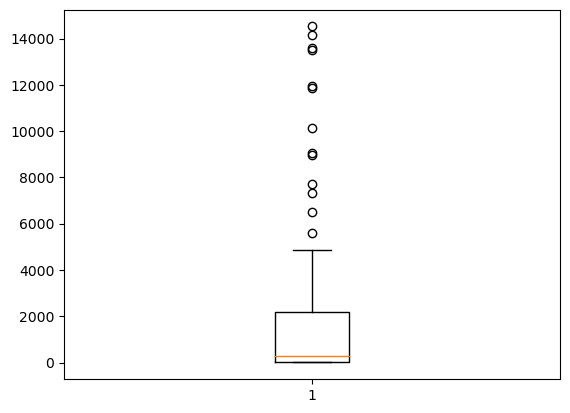

In [34]:
# As we can see, the age column has outliers. 
# For example, the max age is 117 while its mean is 33.7. The mean is sensitive to outliers, 
# but the fact the mean is so small compared to the max value indicates the max value is an outlier.
 
# plotting the box-plot of 'age' -- with outliers : before treatement

plt.boxplot(df['age'].value_counts())
plt.show()
 

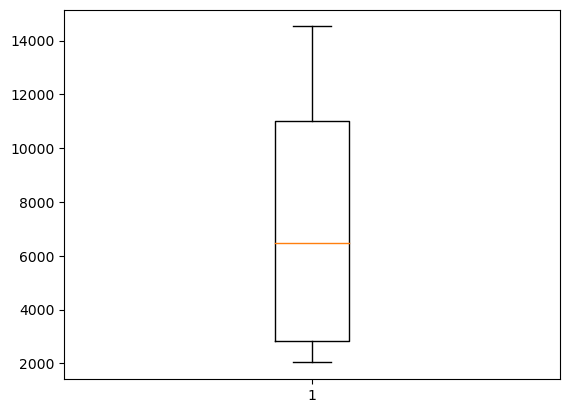

In [35]:
###Treating the outliers with IQR

Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.5)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

upper_range = Q3 + 1.5*IQR
lower_range = Q3 - 1.5*IQR

data_df_filter = df.loc[(df['age'] > lower_range) & (df['age'] < upper_range)]


## plotting boxplot of IQR treated dataset

plt.boxplot(data_df_filter['age'].value_counts())
plt.show()

In [36]:
###From the box plot it is evident that the outliers are treated 

<AxesSubplot:ylabel='rented for'>

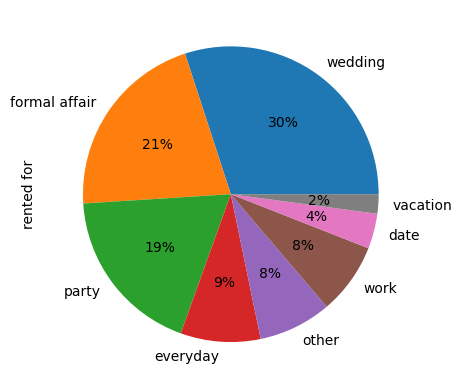

In [37]:
### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

## plotting the distribution of column 'rented for' with percentage values in pie-chart

df['rented for'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [38]:
#  #### Inferences:
# - The above plots show distribution of Rented-for categories over the dataset
# - It is seen that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'

In [39]:
 ### Data Preparation for model building  
### 12. Encode the categorical variables in the dataset.

df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,Missing,0.0,10.0,party,Missing,sheath,64.0,4,116.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


In [40]:
## get all columns with type 'Object'

#categorical_columns = data.select_dtypes('object')


## perform label encoding for selected columns

lbl_encoder = LabelEncoder()
for i in cat_columns:
    df[i] = df[[i]].apply(lbl_encoder.fit_transform)
    
df.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,39,137.0,10.0,5,4,44,68.0,14,28.0
1,0,37,132.0,10.0,3,7,20,66.0,12,36.0
2,0,106,0.0,10.0,4,0,45,64.0,4,116.0
3,0,38,135.0,8.0,2,5,16,65.0,8,34.0
4,0,37,145.0,10.0,6,2,20,69.0,12,27.0


In [41]:
#### Inferences:
### All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique

In [42]:
### 13. Standardize the data, so that the values are within a particular range.

## Standardizing the columns

data_df = df.copy()
data_df.drop(columns='height',axis=1,inplace=True)
scaled_features = StandardScaler().fit_transform(data_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index = data_df.index, columns = data_df.columns)

scaled_features_df.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age
0,-0.556291,-0.295959,0.390908,0.632113,0.514420,0.178145,1.569310,0.206575,-0.680080
1,-0.556291,-0.384988,0.297845,0.632113,-0.456753,1.763791,-0.307247,-0.028862,0.274060
2,-0.556291,2.686512,-2.159027,0.632113,0.028833,-1.936050,1.647500,-0.970608,9.815456
3,-0.556291,-0.340473,0.353683,-0.754859,-0.942340,0.706694,-0.620006,-0.499735,0.035525
4,-0.556291,-0.384988,0.539809,0.632113,1.000007,-0.878953,-0.307247,-0.028862,-0.799347


In [43]:
#### Inferences:
### The provided dataset is standardized using the Standard Scaler technique and all columns are brought to a particular range for performing computation and analysis

In [44]:
##  Principal Component Analysis and Clustering 
###  14. Apply PCA on the above dataset and determine 
### the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

## step 1: Calculate the covariance matrix

covar_matrix = np.cov(scaled_features.T)
covar_matrix

array([[ 1.00000519e+00,  2.50158302e-03,  1.08364122e-02,
        -2.42452840e-01,  8.35378787e-03, -6.72087822e-03,
         3.35892077e-04,  6.54006939e-02,  1.17639094e-03],
       [ 2.50158302e-03,  1.00000519e+00, -1.29927221e-01,
        -2.82402302e-03,  3.89941205e-03, -2.38681523e-01,
        -8.12084214e-03,  3.69772205e-01,  7.27856239e-02],
       [ 1.08364122e-02, -1.29927221e-01,  1.00000519e+00,
        -9.24412628e-03, -7.62722271e-04,  5.20226207e-02,
         3.00232412e-03,  8.77275791e-02,  8.18843181e-02],
       [-2.42452840e-01, -2.82402302e-03, -9.24412628e-03,
         1.00000519e+00,  1.36991658e-02, -1.02927478e-02,
        -2.23637380e-02, -3.63556284e-02, -3.47509531e-02],
       [ 8.35378787e-03,  3.89941205e-03, -7.62722271e-04,
         1.36991658e-02,  1.00000519e+00, -1.92021740e-02,
        -5.76351186e-02,  4.87422452e-03, -3.67805164e-02],
       [-6.72087822e-03, -2.38681523e-01,  5.20226207e-02,
        -1.02927478e-02, -1.92021740e-02,  1.000005

In [45]:
## step 2: Calculate eigen values and eigen vectors


eig_values, eig_vectors = np.linalg.eig(covar_matrix)
print('Eigen values: ', eig_values)

print('Eigen vectors: ',eig_vectors)

Eigen values:  [1.57657625 0.5687596  1.25749638 1.13768174 0.75223975 0.79539214
 1.05745177 0.90757735 0.94687176]
Eigen vectors:  [[-0.11458929 -0.09607836  0.62889308  0.3077281   0.68392941 -0.09968341
   0.04906256  0.08557726  0.00288676]
 [-0.60860233 -0.67899083 -0.17088656  0.1038894  -0.1150819  -0.31069392
  -0.07620536 -0.095582    0.06214257]
 [ 0.05106733 -0.31835165  0.25124282 -0.59852421 -0.09071243 -0.00699275
   0.36355012  0.53282547 -0.22436769]
 [ 0.09315578 -0.01559875 -0.65132559 -0.24401933  0.68430752 -0.16974418
   0.05584342  0.07385462 -0.04056294]
 [-0.00972388 -0.0062835  -0.07860582  0.23987675 -0.03107335  0.01081397
   0.64884452 -0.39588189 -0.59778095]
 [ 0.44414097 -0.06202827  0.19314462 -0.20136987 -0.0850463  -0.73642826
   0.03840611 -0.37606101  0.16905697]
 [ 0.00323015 -0.00110704  0.09860955 -0.16600132  0.03334411 -0.08361917
  -0.64819085 -0.09246526 -0.7251916 ]
 [-0.59921326  0.64969336  0.05252044 -0.20208538 -0.04284922 -0.38828649
  

In [46]:
## step 3: Scree plot

total = sum(eig_values)
var_exp = [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('Explained Variance: ', var_exp)

print('Cummulative Variance Explained: ', cum_var_exp)


Explained Variance:  [17.517422871109424, 13.972109420528117, 12.640842596387197, 11.74940312290725, 10.520742732578105, 10.084140442190115, 8.837644495718072, 8.358175982018858, 6.3195183365628775]
Cummulative Variance Explained:  [ 17.51742287  31.48953229  44.13037489  55.87977801  66.40052074
  76.48466119  85.32230568  93.68048166 100.        ]


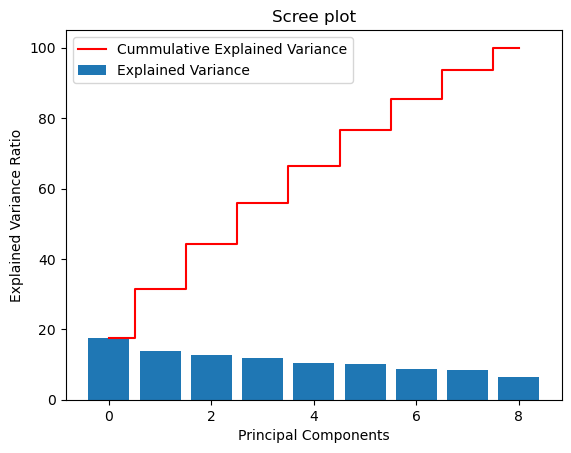

In [47]:
## Scree plot

plt.bar(range(9), var_exp,  label='Explained Variance')
plt.step(range(9), cum_var_exp, where='mid', color='red', label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot')
plt.legend(loc='best')
plt.show()

In [48]:
### It is observed from the above Scree plot, that first 7 principal components are explaining about 90-95% of the variation.
### Hence, the optimal number of principal componets is chosen as 7

In [49]:
### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)
   ###  a. Find the optimal K Value using elbow plot for K Means clustering.
    ### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
    ### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [50]:
## Using dimensions obtained from PCA to apply clustering (i.e., 7)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

pca = PCA(n_components = 7)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.428298,-0.574814,0.426074,0.489331,1.674875,-0.257567,-0.575493
1,-1.115740,-0.227173,1.104251,-0.116641,-0.725558,0.430871,-1.090116
2,4.063383,-0.272589,3.901868,2.080553,-0.856997,6.976100,4.774385
3,-0.831335,0.418389,0.418274,0.155267,-1.079069,-0.214569,0.016568
4,-0.177216,-0.983272,-0.230426,-1.033215,0.837618,-0.776074,0.434819


In [51]:
## Finding optimal K value by KMeans clustering using Elbow plot

cluster_errors = []
cluster_range = range(2,15)

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

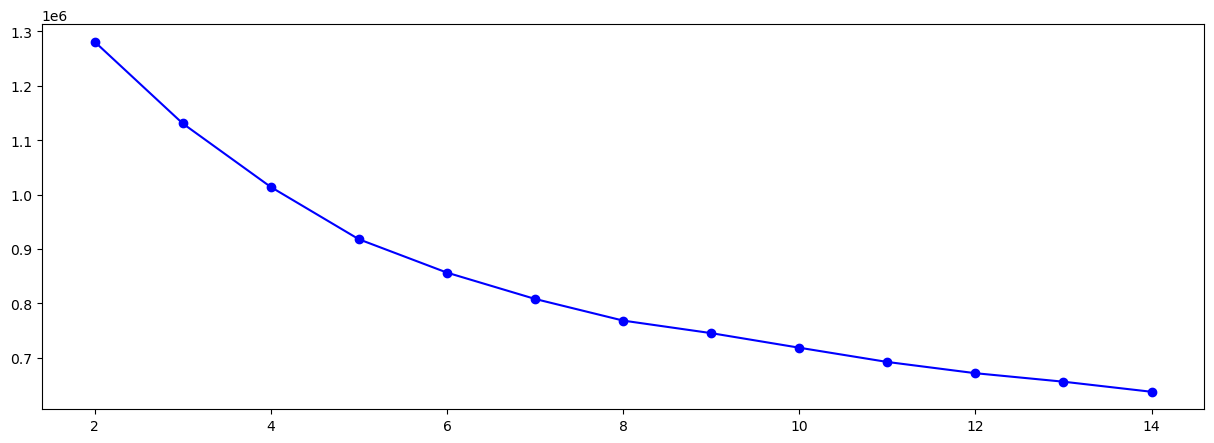

In [52]:
## creating a dataframe of number of clusters and cluster errors

cluster_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})


## Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_cluster'], cluster_df['cluster_errors'], marker='o', color='b')
plt.show()

In [53]:
##### - From the above Elbow plot, it is observed that at cluster K=5, the inertia descreases significantly
### Therefore we are selecting the optimal cluster value as K=5

In [54]:
## Applying KMeans clustering for optimal number of cluster obtained (K=5)

kmeans = KMeans(n_clusters=5, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=5, random_state=100)

In [55]:
## creating a dataframe of labels

label = pd.DataFrame(kmeans.labels_, columns=['Label'])


## joining the label dataframe to the pca_df dataframe

kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Label
0,-0.428298,-0.574814,0.426074,0.489331,1.674875,-0.257567,-0.575493,1
1,-1.115740,-0.227173,1.104251,-0.116641,-0.725558,0.430871,-1.090116,3
2,4.063383,-0.272589,3.901868,2.080553,-0.856997,6.976100,4.774385,0
3,-0.831335,0.418389,0.418274,0.155267,-1.079069,-0.214569,0.016568,3
4,-0.177216,-0.983272,-0.230426,-1.033215,0.837618,-0.776074,0.434819,3


In [56]:
kmeans_df['Label'].value_counts()

3    69868
0    33427
2    31408
1    29341
4    28500
Name: Label, dtype: int64

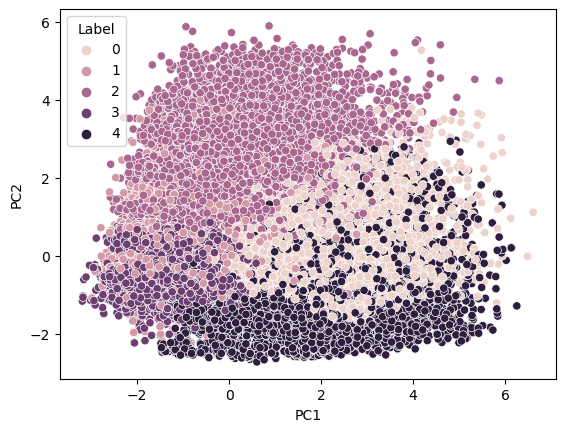

In [57]:
### visuallising the clusters formed 
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

In [58]:
 
## Compute silhouette score for evaluating the quality of the K Means clustering technique. Taking a sample of records to 
## reduce computational time

kmeans_score1 = []

for i in range(2,15):
    kmeans_1 = KMeans(n_clusters = i)
    kmeans_1 = kmeans_1.fit(pca_df.head(50000))
    labels_1 = kmeans_1.predict(pca_df.head(50000))
    print(i, silhouette_score(pca_df.head(50000), labels_1))

2 0.1657102139660989
3 0.19020940109072365
4 0.16119796084162233
5 0.17364959145015138
6 0.14525104934274968
7 0.15011125812069004
8 0.14291209529398335
9 0.14485149924865082
10 0.1492527184182469
11 0.15059282022377105
12 0.13943924612162564
13 0.1432006258912365
14 0.14505943464928273


In [59]:
### - We have obtained the Silhouette scores for various clusters- highest silhouette score is for i=3 --> 3 0.19020940109072365

In [60]:
### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)
#     a. Find the optimal K Value using dendrogram for Agglomerative clustering.
#     b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
#     c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. 
#     (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [61]:
## Considering a sample dataset of 1000 records only to simplify the computation

scaled_features_sample = scaled_features[:10000,:]
print('Shape of scaled_features of the complete dataset: ', scaled_features.shape)
print('Shape of scaled_features of the sample dataset: ', scaled_features_sample.shape)

Shape of scaled_features of the complete dataset:  (192544, 9)
Shape of scaled_features of the sample dataset:  (10000, 9)


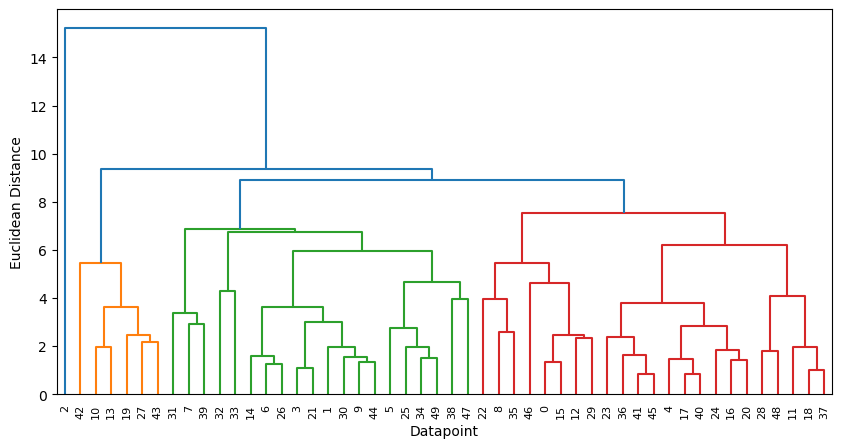

In [62]:
## Agglomerative clustering using original data :: sample dataset  scaled_features[:50] of 50 records
## to CLEARLY SHOW the DENDOGRAM and reduce computational time.

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


plt.figure(figsize=[10,5])
ward=linkage(scaled_features_sample[:50],method='ward')
dendrogram(ward, leaf_rotation=90,color_threshold=0.5*max(ward[:, 2]))
plt.xlabel('Datapoint')
plt.ylabel('Euclidean Distance')
plt.show()

In [63]:
#Optimal value of K is 4.

In [64]:
 #Creating Agglomerative Clustering model
Agl_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
Agl_model.fit(scaled_features_sample)

AgglomerativeClustering(n_clusters=4)

In [65]:
## Building hierarchical clustering model using the optimal clusters as 2 for the sample dataset (10000 records)

hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df.head(10000))

In [66]:
## Computing Silhoutte score from Agglomerative clustering

scaled_features_df_sample = scaled_features_df.head(10000)

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters = i)
    hier = hier.fit(scaled_features_df_sample)
    labels = hier.fit_predict(scaled_features_df_sample)
    print(i, silhouette_score(scaled_features_df_sample, labels))

2 0.20539974168779285
3 0.14650624370085172
4 0.13780371077127984
5 0.1574152306450912
6 0.11128392914168281
7 0.1226695096211195
8 0.11722525739025846
9 0.09424130287261291
10 0.1005544241065272
11 0.10550222217091464
12 0.0904702842340107
13 0.08955010039954889
14 0.08508868276525314


In [67]:
 ## - We have obtained the Silhoutte scores for various clusters, 
    ## it is observed from the above Silhoutte score, that the score is highest for i= 2 -->  0.20539974168779285.

In [68]:
###Conclusion

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and
#  write your conclusion on the results.       

## Building hierarchical clustering model using the optimal clusters as 2 for the sample dataset (10000 records)

hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df.head(10000))

In [69]:
## Creating a dataframe of the labels

df_label = pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label.head()

,Labels
0,2
1,1
2,2
3,1
4,1


In [70]:
## Joining the label dataframes with unscaled initial cleaned dataframe (df_label)

df_hier = data_df.join(df_label)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,size,age,Labels
0,0,39,137.0,10.0,5,4,44,14,28.0,2.0
1,0,37,132.0,10.0,3,7,20,12,36.0,1.0
2,0,106,0.0,10.0,4,0,45,4,116.0,2.0
3,0,38,135.0,8.0,2,5,16,8,34.0,1.0
4,0,37,145.0,10.0,6,2,20,12,27.0,1.0


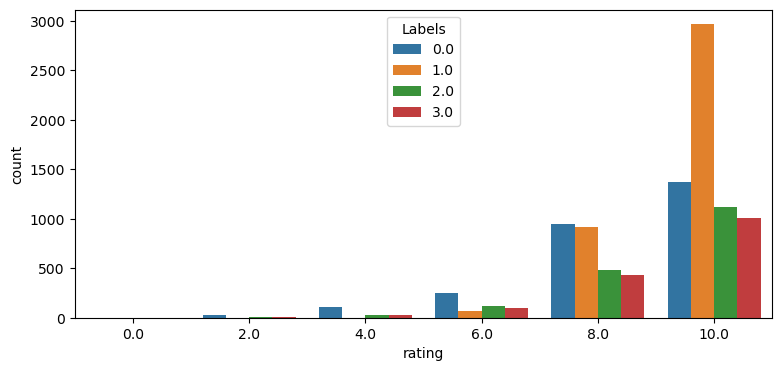

In [71]:
# Comparison of Rating and Label

plt.figure(figsize=[9,4])
sns.countplot(x=df_hier['rating'],hue=df_hier['Labels'],data=df_hier)
plt.show()

In [74]:
# Cluster 1 has highest count of rating

In [75]:
categorical_feature = df_hier.columns
categorical_feature

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'size', 'age', 'Labels'],
      dtype='object')

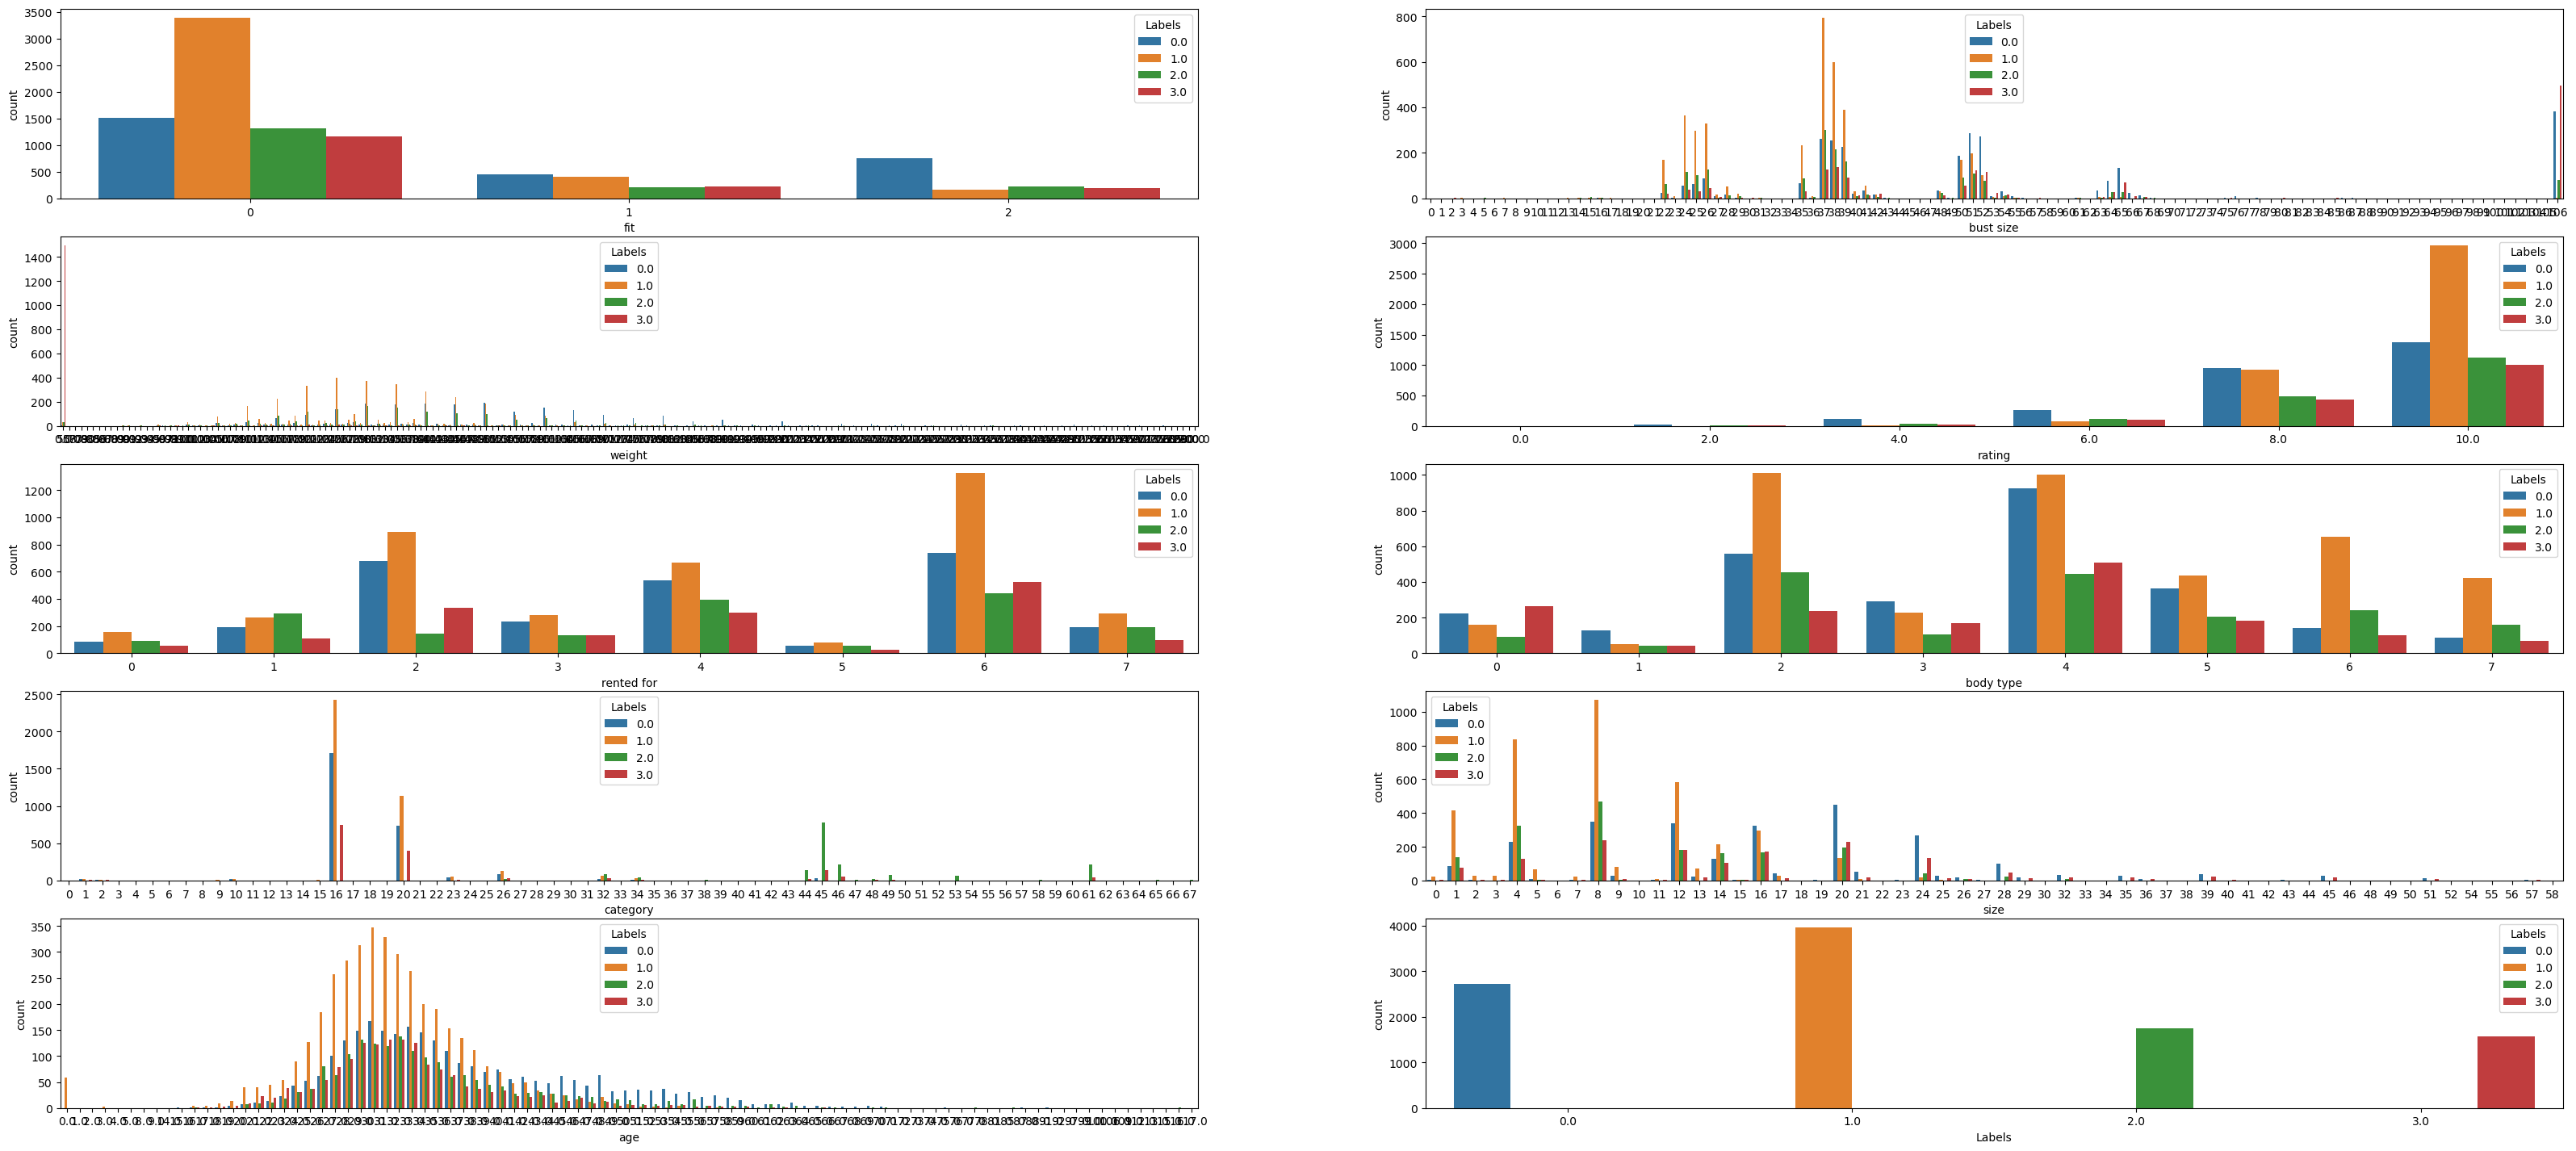

In [76]:

plt.figure(figsize=(40,25))
i=1
for feature in categorical_feature:
    plt.subplot(7,2,i)
    sns.countplot(x=feature,hue='Labels',data=df_hier)
    i+=1
    

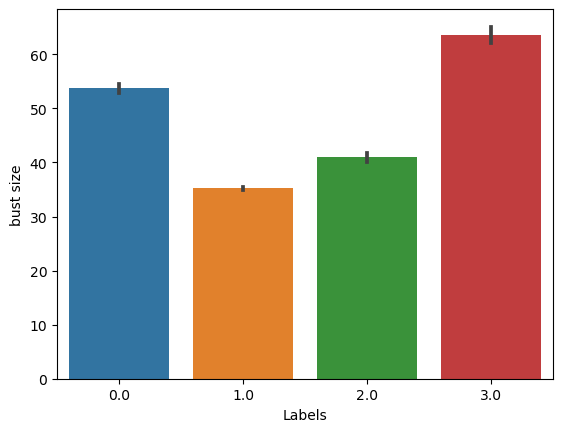

In [77]:
## Visualization and Interpretation of results

sns.barplot(x=df_hier['Labels'],y=df_hier['bust size'])
plt.show()

In [78]:
#cluster associated with Label 3 is has people with highest bust size

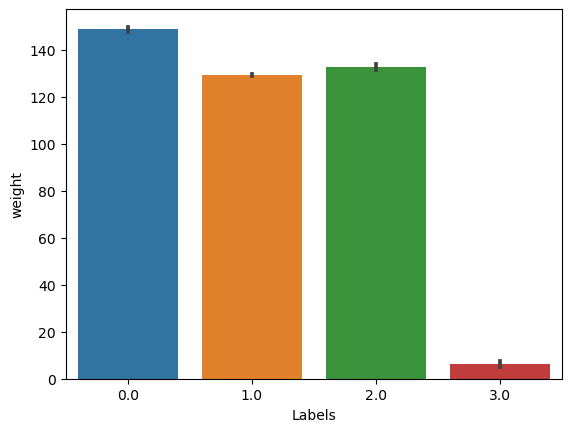

In [79]:
sns.barplot(x=df_hier['Labels'],y=df_hier['weight'])
plt.show()

In [80]:
#cluster associated with Label 0  has people with highest weight and least weight is for cluster with label 3

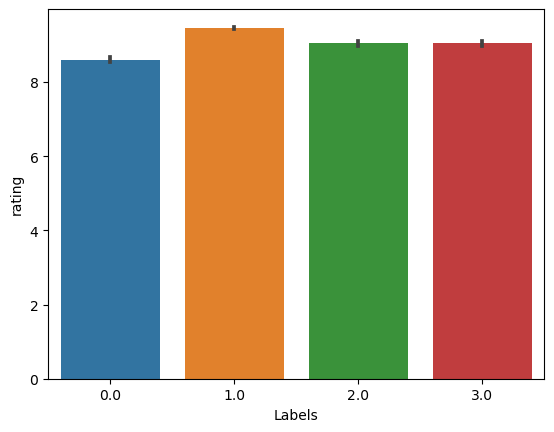

In [81]:
sns.barplot(x=df_hier['Labels'],y=df_hier['rating'])
plt.show()

In [82]:
# cluster associated with label 1 is has  highest rating

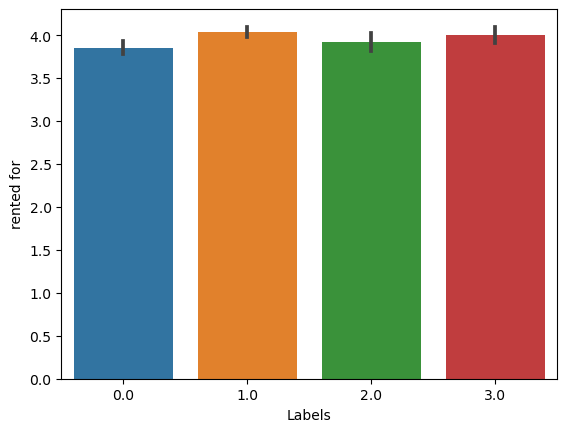

In [83]:
sns.barplot(x=df_hier['Labels'],y=df_hier['rented for'])
plt.show()

In [84]:
#Clusters associated with Labels 1 and 3 have rented most of the items.

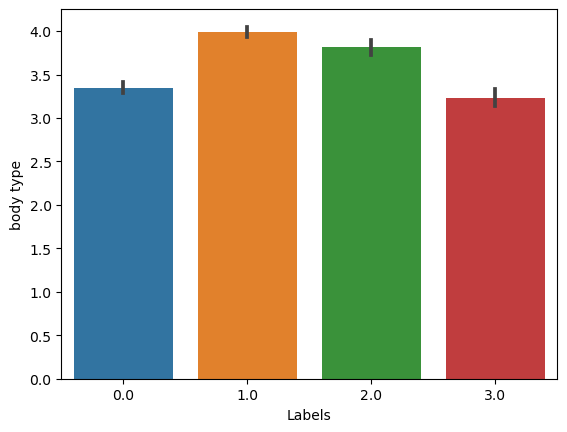

In [85]:
sns.barplot(x=df_hier['Labels'],y=df_hier['body type'])
plt.show()

In [86]:
#Cluster associated with Label 1 has highest number of people with valid body type

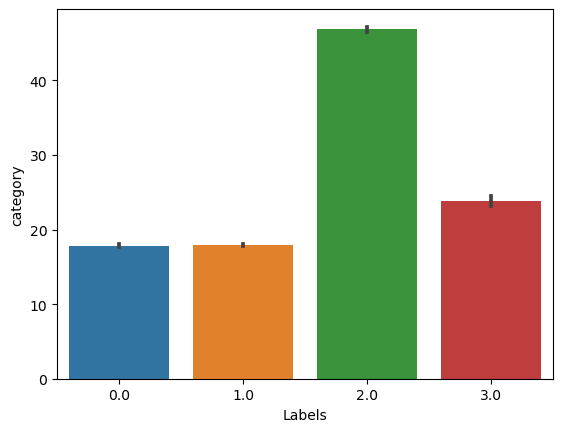

In [87]:
sns.barplot(x=df_hier['Labels'],y=df_hier['category'])
plt.show()

In [88]:
# cluster associated with Label 2 is has highest amount of data in category

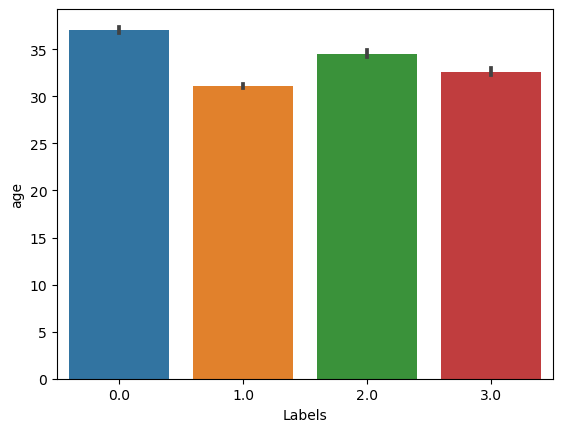

In [89]:
sns.barplot(x=df_hier['Labels'],y=df_hier['age'])
plt.show()

In [90]:
#cluster associated with Label 0 has highest data pertaining to age

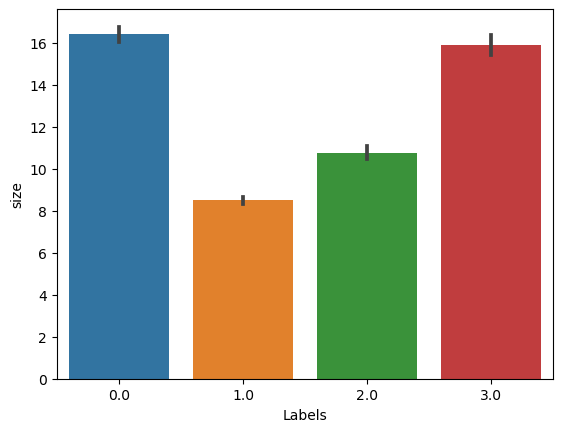

In [91]:
sns.barplot(x=df_hier['Labels'],y=df_hier['size'])
plt.show()

In [92]:
#clusters associated with Label 0 has highest valid data for size  followed by label 3.


#### Inferences:
### Since we deduced optimal K as 4, we have 4 clusters and labels associated: 0,1,2,3 for these 4. 

#cluster associated with Label 3 is has people with highest bust size

#cluster associated with Label 0  has people with highest weight and least weight is for cluster with label 3

#cluster associated with label 1 is has  highest rating

#Clusters associated with Labels 1 and 3 have rented most of the items with label1 slightly higher than label 3

#Cluster associated with Label 1 has highest number of people with valid body type

#cluster associated with Label 2 is has highest amount of data in category

#cluster associated with Label 0 has highest data pertaining to age

#clusters associated with Label 0 and Label 3 have somewhat same and highest valid data for size 
